## PCA on cancer dataset


In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [104]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
cancer['data'].shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


(569, 30)

In [105]:
print(cancer['feature_names'])
# print(cancer['target'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [106]:
#creating a data frame
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* Now we will try to reduce the 30 dimesions into 2 dimensions by using PCA
* First thing that we have to do is to standardize the data , so that the difference between the values should be minimal 

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler #it will convert all values from 0 to 1

scaler = StandardScaler();
scaler.fit(df)

StandardScaler()

In [108]:
#Now we have to transform the data
scaled_data = scaler.transform(df)

In [109]:
from sklearn.decomposition import PCA
#Converting into 2 dimensions
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [110]:
x_pca = pca.transform(scaled_data)

scaled_data.shape

(569, 30)

In [111]:
x_pca.shape
# Now the 30 dimensions have been converted into 2 dimensions

(569, 2)

In [112]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second Pca Component')

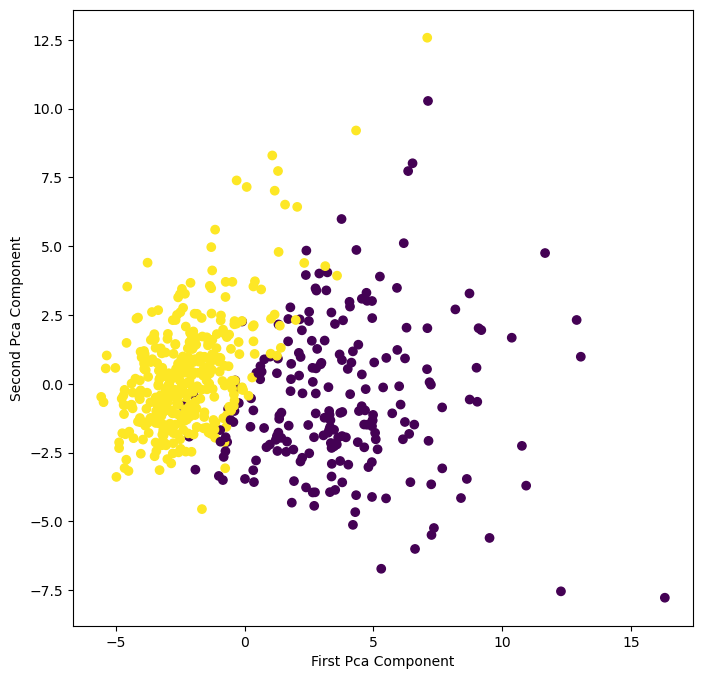

In [113]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel("First Pca Component")
plt.ylabel("Second Pca Component")

# PCA for Iris dataset

In [114]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()
# print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [115]:
iris['data'].shape
# print(iris['DESCR'])

(150, 4)

In [116]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
#Standardizing the features
scaling_data = StandardScaler();
scaling_data.fit(df)

StandardScaler()

In [118]:
#transforming the data
scaled_data_iris = scaling_data.transform(df)
print("After Standardizing features")
print(scaled_data_iris[2])

After Standardizing features
[-1.38535265  0.32841405 -1.39706395 -1.3154443 ]


In [119]:
pca_iris = PCA(n_components=4)
pca_iris.fit(scaled_data_iris)

PCA(n_components=4)

In [120]:
x_iris= pca_iris.transform(scaled_data_iris)
x_iris.shape

(150, 4)

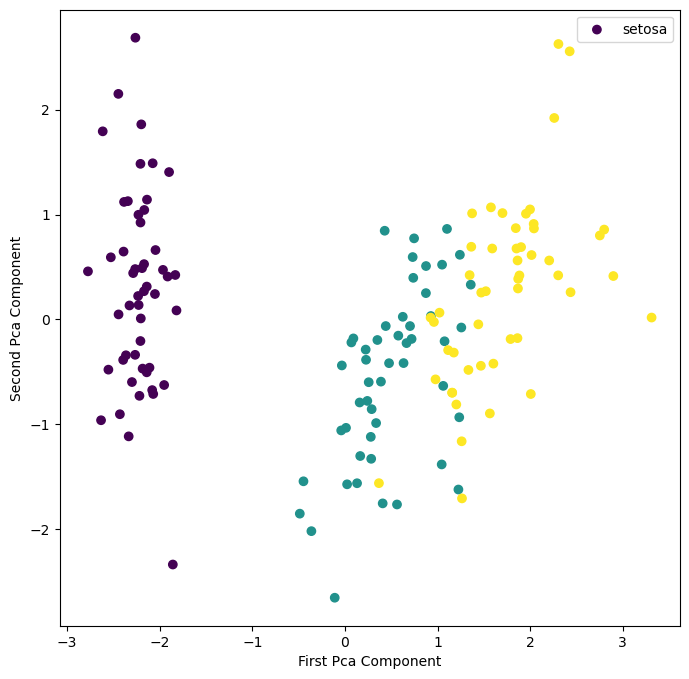

In [126]:
plt.figure(figsize=(8,8))
plt.scatter(x_iris[:,0],x_iris[:,1],c=iris['target'])
plt.xlabel("First Pca Component")
plt.ylabel("Second Pca Component")
plt.legend(labels=iris.target_names)

In [121]:
variance = pca_iris.explained_variance_ratio_
print(variance)
var = np.cumsum(np.round(variance,decimals=3)*100)
print(var)

[0.72962445 0.22850762 0.03668922 0.00517871]
[ 73.   95.9  99.6 100.1]


## PCA fit for 2 component

In [122]:
pca_iris = PCA(n_components=2)
pca_iris.fit(scaled_data_iris)
scaled_data_iris.shape

(150, 4)

In [123]:
x_iris= pca_iris.transform(scaled_data_iris)
x_iris.shape
# print(x_iris)

(150, 2)

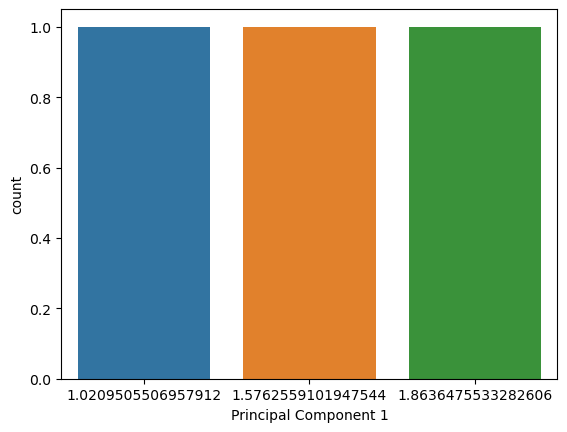

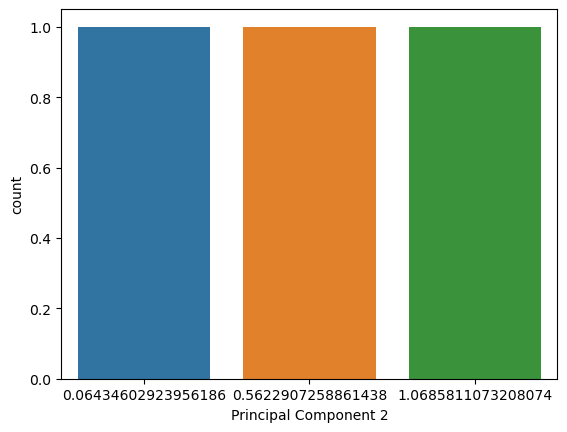

In [147]:
#Concatnating with target variable
principal_df = pd.DataFrame(data=x_iris,columns=['Principal Component 1','Principal Component 2'])
y = pd.DataFrame(iris.target, columns=['Species'])
final_df = pd.concat([principal_df,y],axis=1)

#reducing it to 3 samples
final_df
# import seaborn as sns

def visual(final_df):
    final_df = final_df.sample(3)
    ax = sns.countplot(x='Principal Component 1',data=final_df)
    plt.show()
    ax = sns.countplot(x='Principal Component 2',data=final_df)

visual(final_df)

In [127]:
# explained variance ratio
variance = pca_iris.explained_variance_ratio_
# print(variance)
print("Explained variance ratio: \n" , pca_iris.explained_variance_ratio_*100)

Explained variance ratio: 
 [72.96244541 22.85076179]
